In [1]:
import pandas as pd

In [2]:
game_play = pd.read_csv('User Gameplay data.csv')

In [3]:
game_play['Datetime'] = pd.to_datetime(game_play['Datetime'])

In [4]:
deposit = pd.read_csv('Deposit Data.csv',parse_dates=['Datetime'])

In [5]:
print(deposit.head())

   User ID            Datetime  Deposit Amount
0      357 2022-01-10 00:03:00            2000
1      776 2022-01-10 00:03:00            2500
2      492 2022-01-10 00:06:00            5000
3      803 2022-01-10 00:07:00            5000
4      875 2022-01-10 00:09:00            1500


In [6]:
withdrawl = pd.read_csv('Withdrawal Data.csv', parse_dates=['Datetime'])
withdrawl.head()

,User ID,Datetime,Withdrawal Amount
0,190,2022-01-10 00:03:00,5872
1,159,2022-01-10 00:16:00,9540
2,164,2022-01-10 00:24:00,815
3,946,2022-01-10 00:29:00,23000
4,763,2022-01-10 00:40:00,9473


In [7]:
##Slotwise subdivision of players in games played,deposited amount,withdrawal amount.

slot_times = {
    'S1': {'start': '00:00:00', 'end': '12:00:00'},
    'S2': {'start': '12:00:00', 'end': '23:59:59'}
}
# Create a new column 'Slot' in each data frame
game_play['Slot'] = ''
withdrawl['Slot'] = ''
deposit['Slot'] = ''

# Iterate over the rows in the game_play DataFrame
for index, row in game_play.iterrows():
    # Get the time from the Datetime column
    time = row['Datetime'].time()

    # Assign the slot based on the time
    for slot, slot_time in slot_times.items():
        start_time = pd.to_datetime(slot_time['start']).time()
        end_time = pd.to_datetime(slot_time['end']).time()

        if start_time <= time <= end_time:
            game_play.at[index, 'Slot'] = slot
            break

# Iterate over the rows in the withdrawl DataFrame
for index, row in withdrawl.iterrows():
    # Get the time from the Datetime column
    time = row['Datetime'].time()

    # Assign the slot based on the time
    for slot, slot_time in slot_times.items():
        start_time = pd.to_datetime(slot_time['start']).time()
        end_time = pd.to_datetime(slot_time['end']).time()

        if start_time <= time <= end_time:
            withdrawl.at[index, 'Slot'] = slot
            break

# Iterate over the rows in the deposit DataFrame
for index, row in deposit.iterrows():
    # Get the time from the Datetime column
    time = row['Datetime'].time()

    # Assign the slot based on the time
    for slot, slot_time in slot_times.items():
        start_time = pd.to_datetime(slot_time['start']).time()
        end_time = pd.to_datetime(slot_time['end']).time()

        if start_time <= time <= end_time:
            deposit.at[index, 'Slot'] = slot
            break

# Verify the updated data frames
print("game_play:")
print(game_play[['Datetime', 'Slot']])
print()
print("withdrawl:")
print(withdrawl[['Datetime', 'Slot']])
print()
print("deposit:")
print(deposit[['Datetime', 'Slot']])


game_play:
                  Datetime Slot
0      2022-01-10 00:00:00   S1
1      2022-01-10 00:00:00   S1
2      2022-01-10 00:00:00   S1
3      2022-01-10 00:00:00   S1
4      2022-01-10 00:00:00   S1
...                    ...  ...
355261 2022-10-31 23:59:00   S2
355262 2022-10-31 23:59:00   S2
355263 2022-10-31 23:59:00   S2
355264 2022-10-31 23:59:00   S2
355265 2022-10-31 23:59:00   S2

[355266 rows x 2 columns]

withdrawl:
                Datetime Slot
0    2022-01-10 00:03:00   S1
1    2022-01-10 00:16:00   S1
2    2022-01-10 00:24:00   S1
3    2022-01-10 00:29:00   S1
4    2022-01-10 00:40:00   S1
...                  ...  ...
3561 2022-10-31 23:27:00   S2
3562 2022-10-31 23:51:00   S2
3563 2022-10-31 23:56:00   S2
3564 2022-10-31 23:57:00   S2
3565 2022-10-31 23:58:00   S2

[3566 rows x 2 columns]

deposit:
                 Datetime Slot
0     2022-01-10 00:03:00   S1
1     2022-01-10 00:03:00   S1
2     2022-01-10 00:06:00   S1
3     2022-01-10 00:07:00   S1
4     2022-01-10

In [8]:
## creating a merged dataframe for collective user data on games played,withdrawal and deposited amount.


merged_df = pd.merge(game_play, deposit, on=['User ID', 'Datetime', 'Slot'], how='left')
merged_df = pd.merge(merged_df, withdrawl, on=['User ID', 'Datetime', 'Slot'], how='left')

In [9]:
## The dataframe shows NaN values,because a player played game but didn't deposit or withdrew money at that particular time.


merged_df

,User ID,Games Played,Datetime,Slot,Deposit Amount,Withdrawal Amount
0,851,1,2022-01-10 00:00:00,S1,NaN,NaN
1,717,1,2022-01-10 00:00:00,S1,NaN,NaN
2,456,1,2022-01-10 00:00:00,S1,NaN,NaN
3,424,1,2022-01-10 00:00:00,S1,NaN,NaN
4,845,1,2022-01-10 00:00:00,S1,NaN,NaN
...,...,...,...,...,...,...
355263,658,1,2022-10-31 23:59:00,S2,NaN,NaN
355264,582,1,2022-10-31 23:59:00,S2,NaN,NaN
355265,272,1,2022-10-31 23:59:00,S2,NaN,NaN
355266,563,1,2022-10-31 23:59:00,S2,NaN,NaN


In [10]:
## Repalcing the NaN values by 0 in the dataframe.
merged_df.fillna(0, inplace=True)

In [11]:
merged_df

,User ID,Games Played,Datetime,Slot,Deposit Amount,Withdrawal Amount
0,851,1,2022-01-10 00:00:00,S1,0.0,0.0
1,717,1,2022-01-10 00:00:00,S1,0.0,0.0
2,456,1,2022-01-10 00:00:00,S1,0.0,0.0
3,424,1,2022-01-10 00:00:00,S1,0.0,0.0
4,845,1,2022-01-10 00:00:00,S1,0.0,0.0
...,...,...,...,...,...,...
355263,658,1,2022-10-31 23:59:00,S2,0.0,0.0
355264,582,1,2022-10-31 23:59:00,S2,0.0,0.0
355265,272,1,2022-10-31 23:59:00,S2,0.0,0.0
355266,563,1,2022-10-31 23:59:00,S2,0.0,0.0


In [12]:
merged_df

,User ID,Games Played,Datetime,Slot,Deposit Amount,Withdrawal Amount
0,851,1,2022-01-10 00:00:00,S1,0.0,0.0
1,717,1,2022-01-10 00:00:00,S1,0.0,0.0
2,456,1,2022-01-10 00:00:00,S1,0.0,0.0
3,424,1,2022-01-10 00:00:00,S1,0.0,0.0
4,845,1,2022-01-10 00:00:00,S1,0.0,0.0
...,...,...,...,...,...,...
355263,658,1,2022-10-31 23:59:00,S2,0.0,0.0
355264,582,1,2022-10-31 23:59:00,S2,0.0,0.0
355265,272,1,2022-10-31 23:59:00,S2,0.0,0.0
355266,563,1,2022-10-31 23:59:00,S2,0.0,0.0


In [13]:
# Average deposit per user in the month of october

# Filter the merged_df for a specific month (e.g., January 2023)
filtered_df = merged_df[merged_df['Datetime'].dt.month == 10]

# Calculate the average deposit amount per User ID
average_deposit_per_user = filtered_df.groupby('User ID')['Deposit Amount'].mean()

# Sort the User IDs based on the average deposit amount in ascending order
sorted_user_ids = average_deposit_per_user.sort_values(ascending=False)

# Print the sorted User IDs
print(sorted_user_ids)


User ID
786    5000.000000
526     263.157895
196     228.758170
16      162.852897
735      78.125000
          ...     
354       0.000000
355       0.000000
356       0.000000
357       0.000000
999       0.000000
Name: Deposit Amount, Length: 973, dtype: float64


In [14]:
## Calculation of average deposit amount in a month

# Filter the DataFrame for the desired month
month = 10  # Example month (replace with your desired month)
filtered_df = merged_df[merged_df['Datetime'].dt.month == month]

# Calculate the average deposit amount for all users in the given month
average_deposit = filtered_df['Deposit Amount'].mean()

# Print the average deposit amount
print("Average deposit amount in month {} for all users: {}".format(month, average_deposit))


Average deposit amount in month 10 for all users: 4.204269716880225


In [15]:
## Function to get loyality points for a partiular slot and time

def get_user_stats(slot, date):
    # Filter the merged_df based on the provided slot and date
    filtered_df = merged_df[(merged_df['Slot'] == slot) & (merged_df['Datetime'].dt.date == pd.to_datetime(date).date())]

    # Calculate the Games Played Points, Deposit Points, and Withdrawal Points per User ID
    user_stats = filtered_df.groupby('User ID').agg({
        'Games Played': lambda x: x.sum() * 0.2,
        'Deposit Amount': lambda x: x.sum() * 0.01,
        'Withdrawal Amount': lambda x: x.sum() * 0.005
    }).reset_index()

    # Calculate the total games played, total deposits made, and total withdrawals made per User ID
    user_stats['Total Games Played'] = filtered_df.groupby('User ID')['Games Played'].sum()
    user_stats['Total Deposits Made'] = filtered_df.groupby('User ID')['Deposit Amount'].count()
    user_stats['Total Withdrawals Made'] = filtered_df.groupby('User ID')['Withdrawal Amount'].count()

    # Calculate the Monetary Activity per User ID
    user_stats['Monetary Activity'] = 0.001 * (user_stats['Total Deposits Made'] - user_stats['Total Withdrawals Made']).clip(lower=0)
     # Calculate the Loyalty Points per User ID
    user_stats['Loyalty Points'] = user_stats['Games Played'] + user_stats['Deposit Amount'] + user_stats['Withdrawal Amount'] + user_stats['Monetary Activity']
    # Rename the columns for clarity
    user_stats = user_stats.rename(columns={
        'Games Played': 'Games Played Points',
        'Deposit Amount': 'Deposit Points',
        'Withdrawal Amount': 'Withdrawal Points'
    })

    return user_stats, filtered_df

# Example usage
slot = input("Enter the slot: ")
date = input("Enter the date (YYYY-MM-DD): ")
stats, filtered_data = get_user_stats(slot, date)

print("Filtered Data:")
print(filtered_data.head())

print("User Stats:")
print(stats.dropna().head())



Enter the slot: S1
Enter the date (YYYY-MM-DD): 2022-10-26
Filtered Data:
        User ID  Games Played   Datetime Slot  Deposit Amount  \
286610      722             1 2022-10-26   S1             0.0   
286611       39             1 2022-10-26   S1             0.0   
286612      535             1 2022-10-26   S1             0.0   
286613      581             1 2022-10-26   S1             0.0   
286614      247             1 2022-10-26   S1             0.0   

        Withdrawal Amount  
286610                0.0  
286611                0.0  
286612                0.0  
286613                0.0  
286614                0.0  
User Stats:
   User ID  Games Played Points  Deposit Points  Withdrawal Points  \
0        0                  0.2             0.0                0.0   
2        3                  0.6             0.0                0.0   
3        5                  0.6             0.0                0.0   
5        8                  1.8             0.0                0.0   
6    

In [16]:
## User ranking based on loyality points

sorted_users = stats.sort_values(by='Loyalty Points', ascending=False).reset_index(drop=True)
sorted_users['Rank'] = sorted_users.index + 1

print(sorted_users[['User ID', 'Loyalty Points', 'Rank']].head(10))

   User ID  Loyalty Points  Rank
0      618            94.0     1
1      765            69.2     2
2      587            52.6     3
3      754            21.8     4
4      663            21.4     5
5      247            20.2     6
6      856            19.4     7
7      582            15.4     8
8      887            15.0     9
9      738            14.0    10


## loyality points for the whole month


In [17]:
## Function to calculate loaylity points for the whole month

def get_user_stats():
    # Calculate the Games Played Points, Deposit Points, and Withdrawal Points per User ID for the entire month
    user_stats = merged_df.groupby('User ID').agg({
        'Games Played': lambda x: x.sum() * 0.2,
        'Deposit Amount': lambda x: x.sum() * 0.01,
        'Withdrawal Amount': lambda x: x.sum() * 0.005
    }).reset_index()

    # Calculate the total games played, total deposits made, and total withdrawals made per User ID for the entire month
    user_stats['Total Games Played'] = merged_df.groupby('User ID')['Games Played'].sum()
    user_stats['Total Deposits Made'] = merged_df.groupby('User ID')['Deposit Amount'].count()
    user_stats['Total Withdrawals Made'] = merged_df.groupby('User ID')['Withdrawal Amount'].count()

    # Calculate the Monetary Activity per User ID for the entire month
    user_stats['Monetary Activity'] = 0.001 * (user_stats['Total Deposits Made'] - user_stats['Total Withdrawals Made']).clip(lower=0)

    # Calculate the Loyalty Points per User ID for the entire month
    user_stats['Loyalty Points'] = user_stats['Games Played'] + user_stats['Deposit Amount'] + user_stats['Withdrawal Amount'] + user_stats['Monetary Activity']

    # Rank users based on Loyalty Points (descending order)
    user_stats['Rank'] = user_stats['Loyalty Points'].rank(method='dense', ascending=True)
    
    
    # Rename the columns for clarity
    user_stats = user_stats.rename(columns={
        'Games Played': 'Games Played Points',
        'Deposit Amount': 'Deposit Points',
        'Withdrawal Amount': 'Withdrawal Points'
    })

    return user_stats

# Example usage
stats = get_user_stats()

print("User Stats:")
print(stats.head())


User Stats:
   User ID  Games Played Points  Deposit Points  Withdrawal Points  \
0        0                  3.0             0.0                0.0   
1        1                  1.6             0.0                0.0   
2        2                 19.4             0.0                0.0   
3        3                 16.0             0.0                0.0   
4        4                  1.0             0.0                0.0   

   Total Games Played  Total Deposits Made  Total Withdrawals Made  \
0                  15                   15                      15   
1                   8                    8                       8   
2                  97                   97                      97   
3                  80                   80                      80   
4                   5                    5                       5   

   Monetary Activity  Loyalty Points  Rank  
0                0.0             3.0  15.0  
1                0.0             1.6   8.0  
2          

In [18]:
#Top 50 plaers based on loyality points.



sorted_users = stats.sort_values(by='Loyalty Points', ascending=False).reset_index(drop=True)
sorted_users['Rank'] = sorted_users.index + 1

print(sorted_users[['User ID', 'Loyalty Points','Total Games Played','Rank']].head(50))

    User ID  Loyalty Points  Total Games Played  Rank
0       765        4829.400               24097     1
1        16        4205.720                2093     2
2       663        2961.485                6401     3
3       989        2849.200                3471     4
4       992        2071.500                2483     5
5       618        1978.300                7084     6
6       754        1870.450                5702     7
7       856        1742.000                6035     8
8         9        1738.520                3417     9
9       449        1600.000                6300    10
10      946        1505.400                1662    11
11      247        1478.400                6642    12
12      502        1205.590                4494    13
13       39        1093.000                4265    14
14      456        1085.000                5425    15
15      365        1030.870                3667    16
16      887         988.400                4942    17
17      566         946.955 

In [19]:
#Top 50 Players on the basis of games played

sorted_users = stats.sort_values(by='Total Games Played', ascending=False).reset_index(drop=True)
sorted_users['Rank'] = sorted_users.index + 1

print(sorted_users[['User ID', 'Total Games Played', 'Loyalty Points', 'Rank']].head(50))

    User ID  Total Games Played  Loyalty Points  Rank
0       765               24097        4829.400     1
1       618                7084        1978.300     2
2       247                6642        1478.400     3
3       663                6401        2961.485     4
4       449                6300        1600.000     5
5       856                6035        1742.000     6
6       754                5702        1870.450     7
7       456                5425        1085.000     8
8       887                4942         988.400     9
9       990                4514         902.800    10
10      502                4494        1205.590    11
11      738                4405         881.000    12
12       39                4265        1093.000    13
13      218                3839         787.800    14
14      582                3820         764.000    15
15      602                3676         735.200    16
16      365                3667        1030.870    17
17      205                3

In [20]:
sorted_users = stats.sort_values(by=['Total Games Played', 'Loyalty Points'], ascending=False).reset_index(drop=True)
sorted_users['Rank'] = sorted_users.index + 1

print(sorted_users[['User ID', 'Total Games Played', 'Loyalty Points', 'Rank']].head(50))


    User ID  Total Games Played  Loyalty Points  Rank
0       765               24097        4829.400     1
1       618                7084        1978.300     2
2       247                6642        1478.400     3
3       663                6401        2961.485     4
4       449                6300        1600.000     5
5       856                6035        1742.000     6
6       754                5702        1870.450     7
7       456                5425        1085.000     8
8       887                4942         988.400     9
9       990                4514         902.800    10
10      502                4494        1205.590    11
11      738                4405         881.000    12
12       39                4265        1093.000    13
13      218                3839         787.800    14
14      582                3820         764.000    15
15      602                3676         735.200    16
16      365                3667        1030.870    17
17      205                3

## Bonus Allocation based on weighted approach

In [21]:
# Assign weights to loyalty points and games played
loyalty_points_weight = 0.7
games_played_weight = 0.3

# Normalize loyalty points and games played
normalized_loyalty_points = (stats['Loyalty Points'] - stats['Loyalty Points'].min()) / (stats['Loyalty Points'].max() - stats['Loyalty Points'].min())
normalized_games_played = (stats['Total Games Played'] - stats['Total Games Played'].min()) / (stats['Total Games Played'].max() - stats['Total Games Played'].min())

# Calculate the weighted score
weighted_score = (loyalty_points_weight * normalized_loyalty_points) + (games_played_weight * normalized_games_played)

# Add the weighted score to the stats DataFrame
stats['Weighted Score'] = weighted_score

# Sort the players based on the weighted score
sorted_players = stats.sort_values(by='Weighted Score', ascending=False).reset_index(drop=True)

# Print the sorted players
print(sorted_players[['User ID', 'Loyalty Points', 'Total Games Played', 'Weighted Score']].head(50))



    User ID  Loyalty Points  Total Games Played  Weighted Score
0       765        4829.400               24097        1.000000
1        16        4205.720                2093        0.635642
2       663        2961.485                6401        0.508924
3       989        2849.200                3471        0.456169
4       618        1978.300                7084        0.374913
5       754        1870.450                5702        0.342074
6       992        2071.500                2483        0.331140
7       856        1742.000                6035        0.327601
8       449        1600.000                6300        0.310317
9       247        1478.400                6642        0.296949
10        9        1738.520                3417        0.294502
11      946        1505.400                1662        0.238861
12      502        1205.590                4494        0.230662
13      456        1085.000                5425        0.224773
14       39        1093.000             

In [22]:
## Distribution of bonus in the top players based on loaylity points


bonus_pool = 50000
top_players = sorted_players.head(50).copy()  # Make a copy of the DataFrame
bonus_allocation = (bonus_pool * top_players['Weighted Score']) / top_players['Weighted Score'].sum()

# Set the bonus allocation using .loc
top_players.loc[:, 'Bonus Allocation'] = bonus_allocation

# Print the bonus allocation for the top players
print(top_players[['User ID', 'Loyalty Points', 'Total Games Played', 'Weighted Score', 'Bonus Allocation']])



    User ID  Loyalty Points  Total Games Played  Weighted Score  \
0       765        4829.400               24097        1.000000   
1        16        4205.720                2093        0.635642   
2       663        2961.485                6401        0.508924   
3       989        2849.200                3471        0.456169   
4       618        1978.300                7084        0.374913   
5       754        1870.450                5702        0.342074   
6       992        2071.500                2483        0.331140   
7       856        1742.000                6035        0.327601   
8       449        1600.000                6300        0.310317   
9       247        1478.400                6642        0.296949   
10        9        1738.520                3417        0.294502   
11      946        1505.400                1662        0.238861   
12      502        1205.590                4494        0.230662   
13      456        1085.000                5425        0.22477

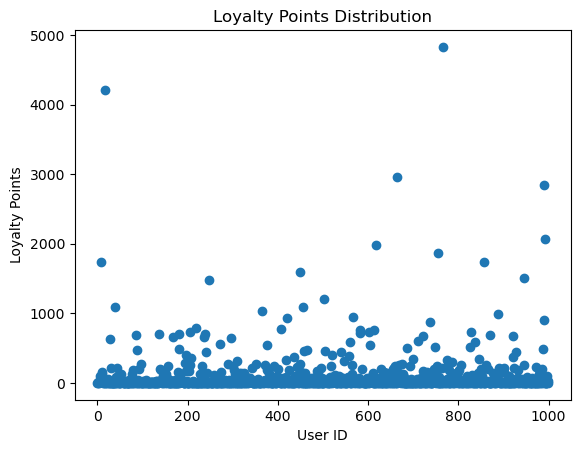

In [25]:

import matplotlib.pyplot as plt

# Assuming 'sorted_users' is the DataFrame containing User ID and Loyalty Points
plt.scatter(sorted_users['User ID'], sorted_users['Loyalty Points'])
plt.xlabel('User ID')
plt.ylabel('Loyalty Points')
plt.title('Loyalty Points Distribution')
plt.show()

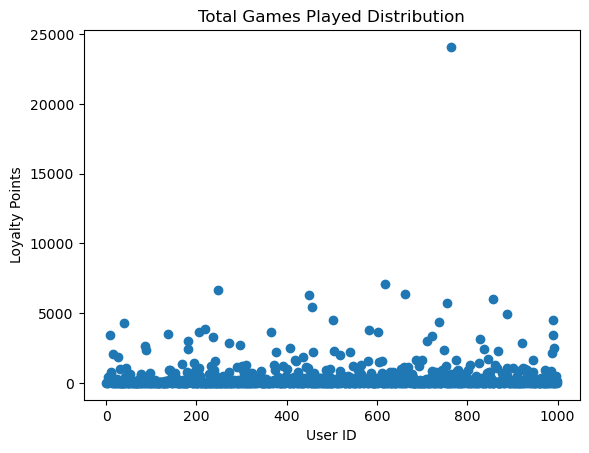

In [29]:
# Assuming 'sorted_users' is the DataFrame containing User ID Total games played
import matplotlib.pyplot as plt
plt.scatter(sorted_users['User ID'], sorted_users['Total Games Played'])
plt.xlabel('User ID')
plt.ylabel('Loyalty Points')
plt.title('Total Games Played Distribution')
plt.show()